# Anonomaly detection with k-means clustering

In this notebook we will use k-means clustering to detect anomalies in unlabelled data. i.e. We dont know what anomalies looks like beforehand

This dataset comes from the daily measures of sensors in a urban waste water treatment plant. The objective is to classify the operational state of the plant in order to predict faults through the state variables of the plant at each of the stages of the treatment process.

<img src='water.jpg'>

The variables in the data are as follows:

| Column   | Description                                                          |
|----------|----------------------------------------------------------------------|
| Q-E      | (input flow to plant)                                                |
| ZN-E     | (input Zinc to plant)                                                |
| PH-E     | (input pH to plant)                                                  |
| DBO-E    | (input Biological demand of oxygen to plant)                         |
| DQO-E    | (input chemical demand of oxygen to plant)                           |
| SS-E     | (input suspended solids to plant)                                    |
| SSV-E    | (input volatile supended solids to plant)                            |
| SED-E    | (input sediments to plant)                                           |
| COND-E   | (input conductivity to plant)                                        |
| PH-P     | (input pH to primary settler)                                        |
| DBO-P    | (input Biological demand of oxygen to primary settler)               |
| SS-P     | (input suspended solids to primary settler)                          |
| SSV-P    | (input volatile supended solids to primary settler)                  |
| SED-P    | (input sediments to primary settler)                                 |
| COND-P   | (input conductivity to primary settler)                              |
| PH-D     | (input pH to secondary settler)                                      |
| DBO-D    | (input Biological demand of oxygen to secondary settler)             |
| DQO-D    | (input chemical demand of oxygen to secondary settler)               |
| SS-D     | (input suspended solids to secondary settler)                        |
| SSV-D    | (input volatile supended solids to secondary settler)                |
| SED-D    | (input sediments to secondary settler)                               |
| COND-D   | (input conductivity to secondary settler)                            |
| PH-S     | (output pH)                                                          |
| DBO-S    | (output Biological demand of oxygen)                                 |
| DQO-S    | (output chemical demand of oxygen)                                   |
| SS-S     | (output suspended solids)                                            |
| SSV-S    | (output volatile supended solids)                                    |
| SED-S    | (output sediments)                                                   |
| COND-S   | (output conductivity)                                                |
| RD-DBO-P | (performance input Biological demand of oxygen in primary settler)   |
| RD-SS-P  | (performance input suspended solids to primary settler)              |
| RD-SED-P | (performance input sediments to primary settler)                     |
| RD-DBO-S | (performance input Biological demand of oxygen to secondary settler) |
| RD-DQO-S | (performance input chemical demand of oxygen to secondary settler)   |
| RD-DBO-G | (global performance input Biological demand of oxygen)               |
| RD-DQO-G | (global performance input chemical demand of oxygen)                 |
| RD-SS-G  | (global performance input suspended solids)                          |
| RD-SED-G | (global performance input sediments)                                 |

## load libraries

In [1]:
# libraries
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


## read in data 

In [2]:
df = pd.read_csv("anomaly_water_clean.csv",index_col=0)

In [3]:
df.head()

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
1,1990-03-01,44101.0,1.5,7.8,188.714286,407.0,166.0,66.3,4.5,2110,...,2000.0,39.085806,58.8,95.5,83.448049,70.0,89.013646,79.4,87.3,99.6
2,1990-03-02,39024.0,3.0,7.7,188.714286,443.0,214.0,69.2,6.5,2660,...,2590.0,39.085806,60.7,94.8,83.448049,80.8,89.013646,79.5,92.1,100.0
3,1990-03-04,32229.0,5.0,7.6,188.714286,528.0,186.0,69.9,3.4,1666,...,1888.0,39.085806,58.2,95.6,83.448049,52.9,89.013646,75.8,88.7,98.5
4,1990-03-05,35023.0,3.5,7.9,205.000000,588.0,192.0,65.6,4.5,2430,...,1840.0,33.100000,64.2,95.3,87.300000,72.3,90.200000,82.3,89.6,100.0
5,1990-03-06,36924.0,1.5,8.0,242.000000,496.0,176.0,64.8,4.0,2110,...,2120.0,39.085806,62.7,95.6,83.448049,71.0,92.100000,78.2,87.5,99.5


## understand data

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 1 to 527
Data columns (total 39 columns):
Date        527 non-null object
Q-E         527 non-null float64
ZN-E        527 non-null float64
PH-E        527 non-null float64
DBO-E       527 non-null float64
DQO-E       527 non-null float64
SS-E        527 non-null float64
SSV-E       527 non-null float64
SED-E       527 non-null float64
COND-E      527 non-null int64
PH-P        527 non-null float64
DBO-P       527 non-null float64
SS-P        527 non-null int64
SSV-P       527 non-null float64
SED-P       527 non-null float64
COND-P      527 non-null int64
PH-D        527 non-null float64
DBO-D       527 non-null float64
DQO-D       527 non-null float64
SS-D        527 non-null float64
SSV-D       527 non-null float64
SED-D       527 non-null float64
COND-D      527 non-null int64
PH-S        527 non-null float64
DBO-S       527 non-null float64
DQO-S       527 non-null float64
SS-S        527 non-null float64
SSV-S       5

In [6]:
# check the timestamp format and frequency
print(df['Date'].head(10))

1     1990-03-01
2     1990-03-02
3     1990-03-04
4     1990-03-05
5     1990-03-06
6     1990-03-07
7     1990-03-08
8     1990-03-09
9     1990-03-11
10    1990-03-12
Name: Date, dtype: object


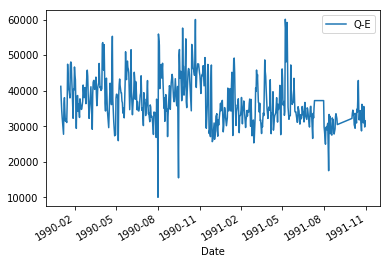

In [8]:
# change the type of timestamp column for plotting
df['Date'] = pd.to_datetime(df['Date'])
# plot the data
df.plot(x='Date', y='Q-E')

## Clustering

We group together the usual combination of features. The points that are far from the cluster are points with unusual combinations of features.We consider those points as anomalies.

In [ ]:
# Take useful feature and standardize them
data = df.drop(['Date'],axis=1)
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [ ]:
#I choose 2 centroids arbitrarily and add these data to the central dataframe
n_clust = 2
kmeans = KMeans(n_clust).fit(data)
scores = kmeans.score(data)
df['cluster'] = kmeans.predict(data)

#to visualize we must reduce to 2 principle components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_pca)
data_pca = pd.DataFrame(np_scaled)

df['principal_feature1'] = data_pca[0]
df['principal_feature2'] = data_pca[1]
df['cluster'].value_counts()
df = df.dropna()

In [ ]:
#plot the different clusters with the 2 main features)
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
plt.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))

In [ ]:
#define function to calcuate distance to cluster center
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance


In [ ]:
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans)
df['distance'] = distance

In [ ]:
#set the fraction of point to classify as outliers
outliers_fraction = 0.01

In [ ]:
# anomaly21 contain the anomaly result of cluster method (0:normal, 1:anomaly) 
distance = getDistanceByPoint(data, kmeans)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)

In [ ]:
# visualisation of anomaly with cluster view
plt.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly21"].apply(lambda x: colors[x]))

## Visualization through time

Make a few plots of the data through time. You can plot the raw data, and also the principle components which summarize the data. On these plots, add lines or points to show where the anomlies occur in time